## Loading libraries and creating the dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px

In [3]:
data=pd.read_csv('TSLA.csv')

## Explore the dataset

In [5]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999


In [6]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,639.000000,639.000000,639.000000,639.000000,6.390000e+02,639.000000
mean,543.362885,517.883537,531.004088,531.298030,4.819130e+07,531.298030
std,340.837426,325.395864,333.534448,333.362040,3.579030e+07,333.362040
min,46.896000,44.855999,45.959999,46.285999,9.800600e+06,46.285999
25%,170.258003,162.379997,167.349998,164.783005,2.392195e+07,164.783005
50%,620.409973,595.500000,603.880005,605.130005,3.448900e+07,605.130005
75%,796.584991,767.744995,779.445007,781.304993,6.329725e+07,781.304993
max,1243.489990,1217.000000,1234.410034,1229.910034,3.046940e+08,1229.910034


In [7]:
data.shape

(639, 7)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       639 non-null    object 
 1   High       639 non-null    float64
 2   Low        639 non-null    float64
 3   Open       639 non-null    float64
 4   Close      639 non-null    float64
 5   Volume     639 non-null    float64
 6   Adj Close  639 non-null    float64
dtypes: float64(6), object(1)
memory usage: 35.1+ KB


In [10]:
data.columns


Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

## Modifying the dataset

In [ ]:
# Converting the Date Column to datetime values

In [11]:
data['Date']=pd.to_datetime(data['Date'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       639 non-null    datetime64[ns]
 1   High       639 non-null    float64       
 2   Low        639 non-null    float64       
 3   Open       639 non-null    float64       
 4   Close      639 non-null    float64       
 5   Volume     639 non-null    float64       
 6   Adj Close  639 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 35.1 KB


In [14]:
# Checking null values

In [15]:
data.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [16]:
# Check unique values

In [19]:
data.nunique().sort_values()

High         633
Open         633
Low          635
Close        638
Volume       638
Adj Close    638
Date         639
dtype: int64

In [20]:
# Check duplicated values

In [21]:
data.duplicated().sum()

0

In [22]:
# Make 2 Columns -Month and Year

In [23]:
data['Month']=data['Date'].dt.month

In [24]:
data['Year']=data['Date'].dt.year

In [25]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Month,Year
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000,9,2019
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000,10,2019
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999,10,2019
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999,10,2019
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999,10,2019


## Visualization and Analysis

In [26]:
# Show relation between Date of High and Low value

<AxesSubplot:title={'center':'Corellation between Date and Low&High values'}, xlabel='Date', ylabel='Low'>

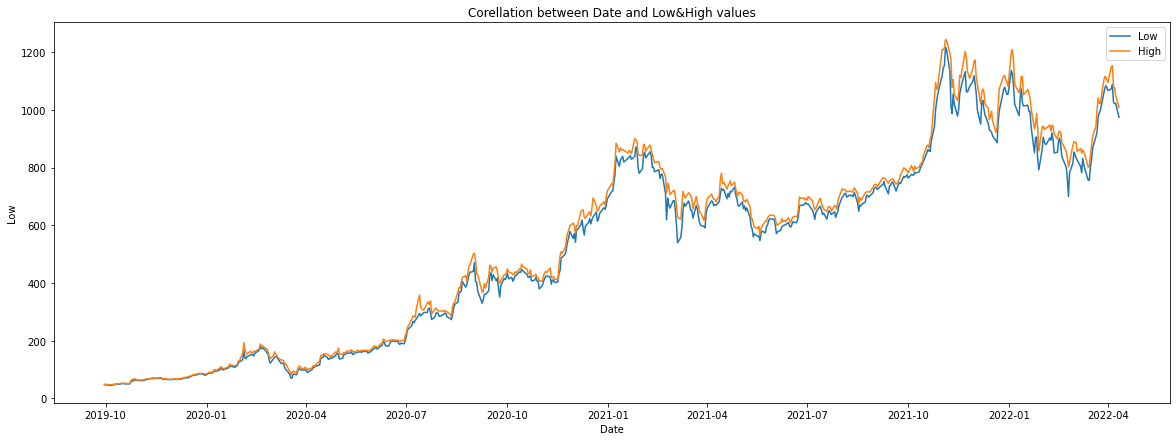

In [30]:
plt.figure(figsize=(20,7))
plt.title('Corellation between Date and Low&High values')
sns.lineplot(x=data['Date'],y=data['Low'],label='Low')
sns.lineplot(x=data['Date'],y=data['High'],label='High')

In [31]:
# Show relation between Date and Open&Close values

<AxesSubplot:title={'center':'Corelation between Date and Open & Close values'}, xlabel='Date', ylabel='Open'>

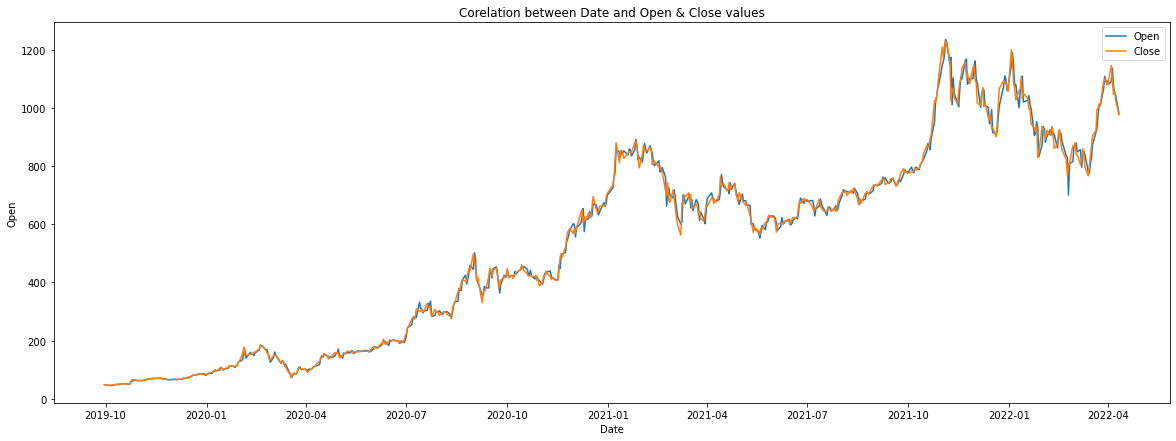

In [32]:
plt.figure(figsize=(20,7))
plt.title('Corelation between Date and Open & Close values')
sns.lineplot(x=data['Date'],y=data['Open'],label='Open')
sns.lineplot(x=data['Date'],y=data['Close'],label='Close')

In [33]:
# Visualization of the relation between Date and Volume


<AxesSubplot:title={'center':'Corelation between Date and Volume'}, xlabel='Date', ylabel='Volume'>

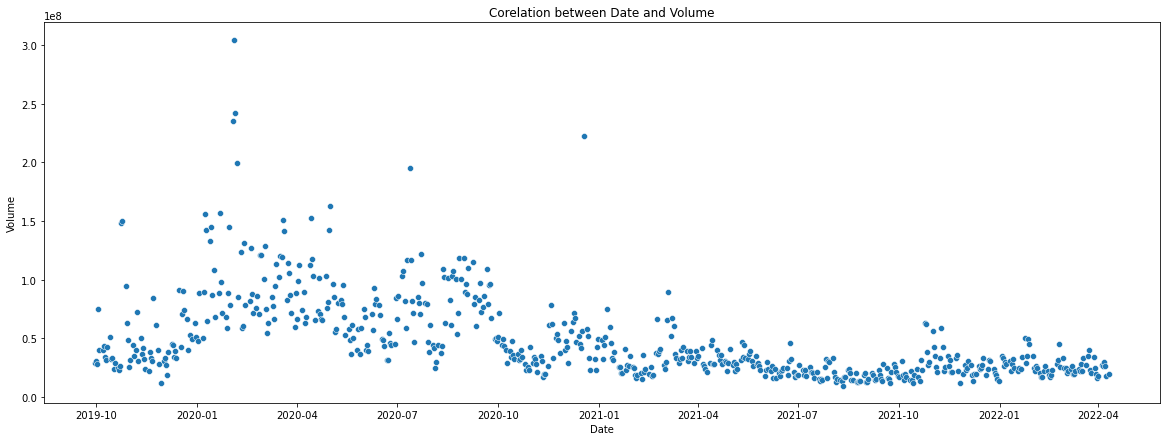

In [37]:
plt.figure(figsize=(20,7))
plt.title('Corelation between Date and Volume')
sns.scatterplot(x=data['Date'],y=data['Volume'])

In [38]:
# Create a new dataframe containing the mean values for Low,High,Open and Close by year

In [40]:
a=data.groupby('Year')['High','Low','Open','Close'].mean().round(2)

<ipython-input-40-573020b8cd90>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a=data.groupby('Year')['High','Low','Open','Close'].mean().round(2)


In [41]:
a.head()

,High,Low,Open,Close
Year,,,,
2019,65.61,63.69,64.49,64.81
2020,297.29,280.70,289.11,290.00
2021,795.73,762.71,779.84,779.99
2022,974.00,921.28,948.64,947.23


In [42]:
# Draw a graph based on this new dataframe

<AxesSubplot:xlabel='Year'>

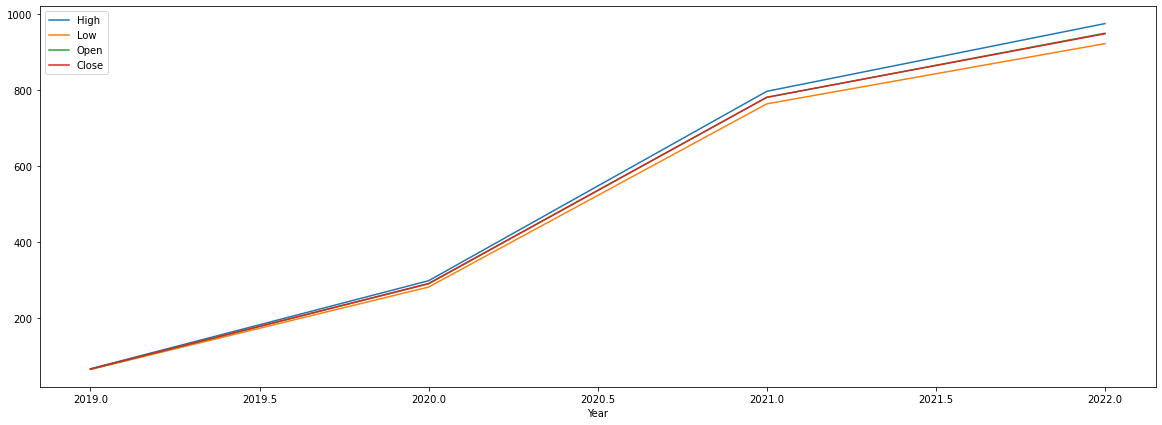

In [43]:
a.plot(figsize=(20,7))

## Building Machine Learning Models

In [44]:
# Importing all the libraries

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error,confusion_matrix,accuracy_score,r2_score
from sklearn.linear_model import LinearRegression,ARDRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [47]:
# We can drop some columns like Date and Adj Close because is the same with Close

In [48]:
data.drop(columns=['Date','Adj Close'],inplace=True)

In [50]:
data.head()

,High,Low,Open,Close,Volume,Month,Year
0,48.796001,47.222000,48.599998,48.174000,29399000.0,9,2019
1,49.189999,47.826000,48.299999,48.938000,30813000.0,10,2019
2,48.930000,47.886002,48.658001,48.625999,28157000.0,10,2019
3,46.896000,44.855999,46.372002,46.605999,75422500.0,10,2019
4,46.956001,45.613998,46.321999,46.285999,39975000.0,10,2019


In [51]:
# Create data to be splited

In [53]:
X=data.drop(columns='Volume')
y=data['Volume']

In [54]:
X.head()

,High,Low,Open,Close,Month,Year
0,48.796001,47.222000,48.599998,48.174000,9,2019
1,49.189999,47.826000,48.299999,48.938000,10,2019
2,48.930000,47.886002,48.658001,48.625999,10,2019
3,46.896000,44.855999,46.372002,46.605999,10,2019
4,46.956001,45.613998,46.321999,46.285999,10,2019


In [56]:
y.head()

0    29399000.0
1    30813000.0
2    28157000.0
3    75422500.0
4    39975000.0
Name: Volume, dtype: float64

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=.25)

In [58]:
# Print some datasets details

In [62]:
f'X Train dataset size:{X_train.shape}'

'X Train dataset size:(479, 6)'

In [63]:
f'X Test dataset size :{X_test.shape}'

'X Test dataset size :(160, 6)'

# MACHINE LEARNING MODELS

In [285]:
# Creating a dictionary to store all models and scores to create a accuracy pplot display

In [286]:
dict_scores={}

## Liniar Regression Model

In [295]:
LR=LinearRegression()


In [296]:
# Training the model

In [297]:
LR.fit(X_train,y_train)

LinearRegression()

In [298]:
# Creating predictions for test set

In [299]:
y_pred=LR.predict(X_test)

In [300]:
# Calculating Score

In [301]:
r2_score(y_test,y_pred)*100

45.27556151323366

In [302]:
LR.score(X_train,y_train)*100 # Score for Training Set

49.453442985164855

In [303]:
LR.score(X_test,y_test)*100 # Score for Test Set

45.27556151323366

In [304]:
# Visualizing the predictions

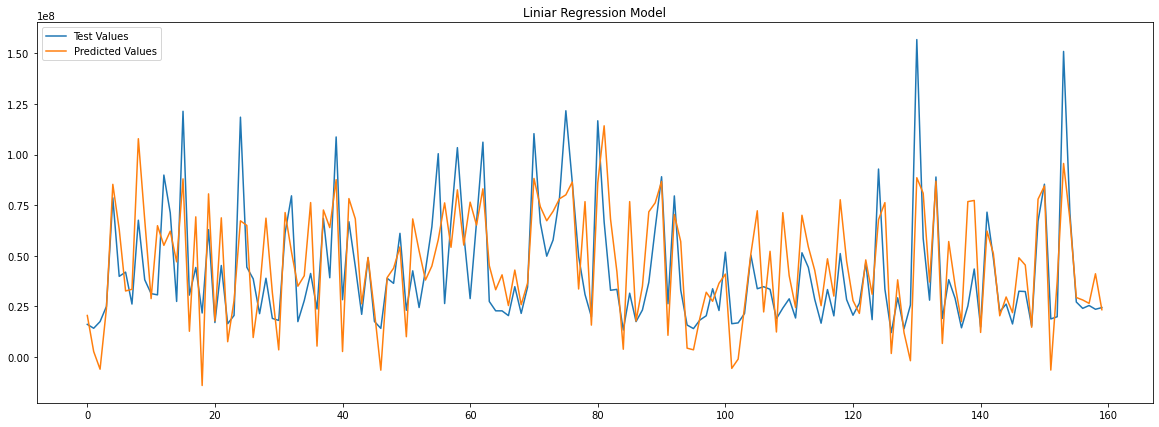

In [305]:
plt.figure(figsize=(20,7))
plt.title('Liniar Regression Model')
plt.plot(y_test.values)
plt.plot(y_pred)
plt.legend(['Test Values','Predicted Values'],loc='best')


In [306]:
dict_scores['Liniar Regression']=r2_score(y_test,y_pred)*100

## Decission Tree Regressor Model

In [326]:
DT=DecisionTreeRegressor(max_depth=7,max_features=3)

In [327]:
# Training the model

In [328]:
DT.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7, max_features=3)

In [329]:
# Making Predictions on the Test Set

In [330]:
y_pred=DT.predict(X_test)

In [331]:
# Score for Model

In [332]:
DT_score=r2_score(y_test,y_pred)*100

In [333]:
DT_score

54.17857149565185

In [334]:
# Training and test scores

In [335]:
DT.score(X_train,y_train)*100

81.46879647159048

In [336]:
DT.score(X_test,y_test)*100

54.17857149565185

In [337]:
# Visualizing the predictions

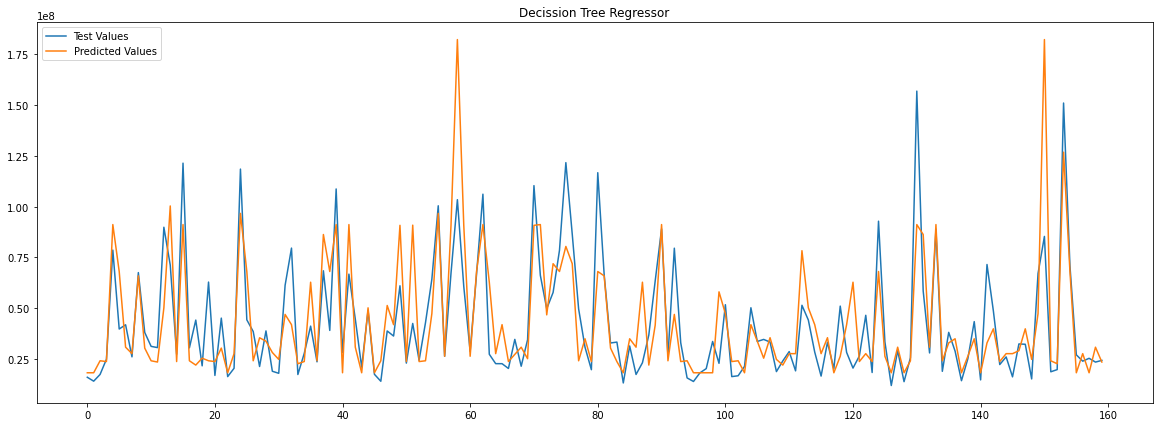

In [338]:
plt.figure(figsize=(20,7))
plt.title('Decission Tree Regressor')
plt.plot(y_test.values)
plt.plot(y_pred)
plt.legend(['Test Values','Predicted Values'])

In [339]:
dict_scores['Decission Tree Regressor']=DT_score

## Random Forest Regressor Model

In [341]:
# Constructing the model

In [561]:
RFR=RandomForestRegressor(n_estimators=5,max_features=4,max_depth=3,random_state=42)

In [562]:
# Training the model

In [563]:
RFR.fit(X_train,y_train)

RandomForestRegressor(max_depth=3, max_features=4, n_estimators=5,
                      random_state=42)

In [564]:
# Making Prediction 

In [565]:
y_pred=RFR.predict(X_test)

In [566]:
# Calculating scores

In [567]:
RFR_score=r2_score(y_test,y_pred)*100

In [568]:
RFR_score

66.65914340387613

In [569]:
RFR.score(X_train,y_train)*100

60.79587946465579

In [570]:
RFR.score(X_test,y_test)*100

66.65914340387613

In [571]:
# Visualizing the result

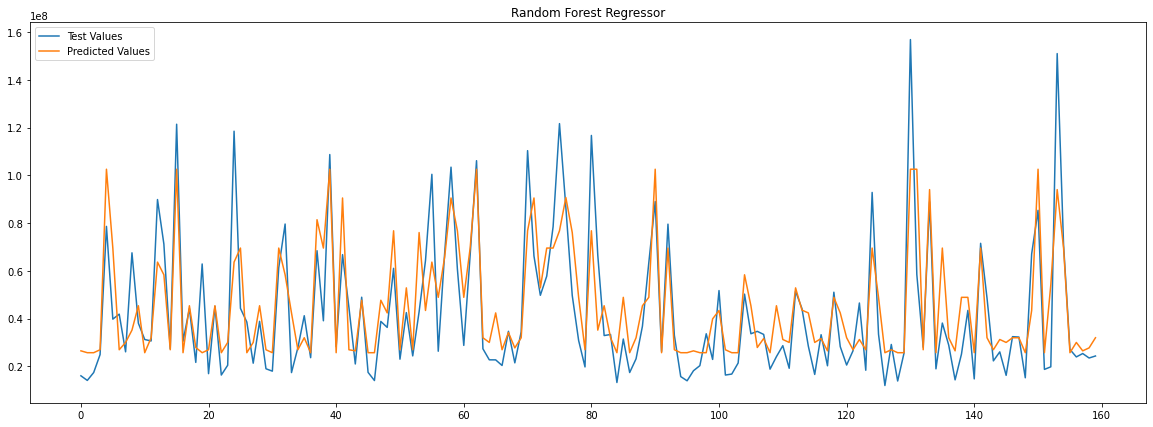

In [573]:
plt.figure(figsize=(20,7))
plt.title('Random Forest Regressor')
plt.plot(y_test.values)
plt.plot(y_pred)
plt.legend(['Test Values','Predicted Values'])

In [574]:
dict_scores['Random Forest Regressor']=RFR_score

## K Nearest Neighbour Model

In [576]:
# Constructing the model

In [733]:
KNN=KNeighborsRegressor(n_neighbors=10,weights='distance',algorithm='brute',leaf_size=50,p=15)

In [734]:
# Training the model

In [735]:
KNN.fit(X_train,y_train)

KNeighborsRegressor(algorithm='brute', leaf_size=50, n_neighbors=10, p=15,
                    weights='distance')

In [736]:
# Predicting values

In [737]:
y_pred=KNN.predict(X_test)

In [738]:
# Calculating scores

In [739]:
KNN_score=r2_score(y_test,y_pred)*100

In [740]:
KNN_score

62.957807154064604

In [741]:
KNN.score(X_train,y_train)*100

100.0

In [742]:
KNN.score(X_test,y_test)*100

62.957807154064604

In [743]:
# Visualizing the result

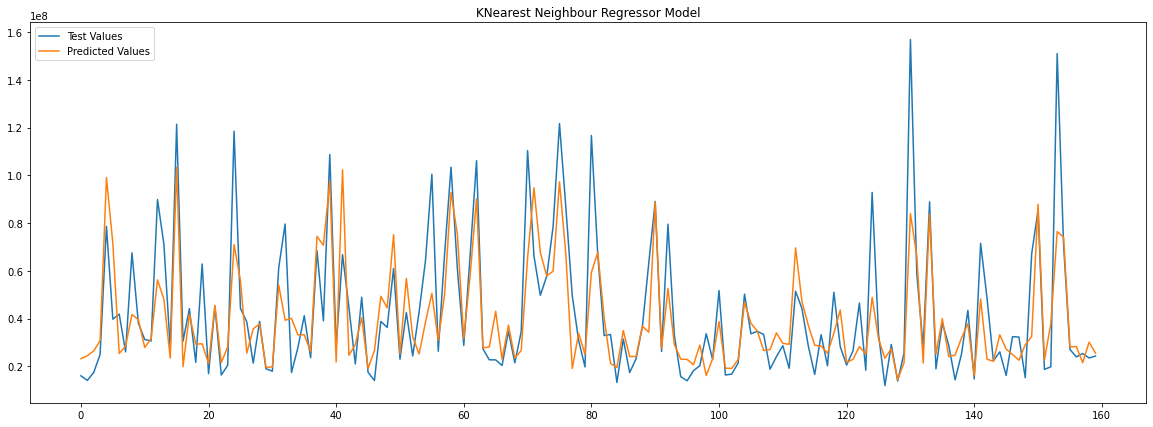

In [744]:
plt.figure(figsize=(20,7))
plt.title('KNearest Neighbour Regressor Model')
plt.plot(y_test.values)
plt.plot(y_pred)
plt.legend(['Test Values','Predicted Values'])

In [745]:
dict_scores['KNeighborRegressor']=KNN_score

## MLP Regressor Model

In [793]:
# Constructing the model

In [978]:
MLP=MLPRegressor(max_iter=1000,random_state=42,learning_rate_init=0.01,hidden_layer_sizes=(7,3))

In [979]:
#Training the moddel

In [980]:
MLP.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(7, 3), learning_rate_init=0.01, max_iter=1000,
             random_state=42)

In [981]:
# Making Predictions

In [982]:
y_pred=MLP.predict(X_test)

In [983]:
#Calculating scores

In [984]:
MLP_score=r2_score(y_test,y_pred)*100

In [985]:
MLP_score

23.20384570289611

In [986]:
MLP.score(X_train,y_train)*100

32.35512280211032

In [987]:
MLP.score(X_test,y_test)*100

23.20384570289611

In [988]:
# Visualizing the results

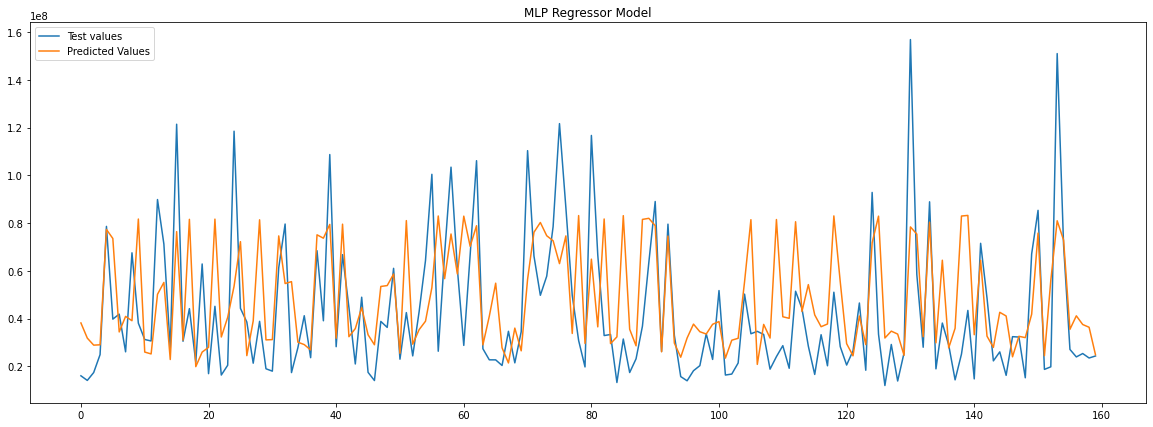

In [989]:
plt.figure(figsize=(20,7))
plt.title('MLP Regressor Model')
plt.plot(y_test.values)
plt.plot(y_pred)
plt.legend(['Test values','Predicted Values'])

In [990]:
dict_scores['MLPRegressor']=MLP_score

## XGB Regressor

In [992]:
# Constructing the model

In [1095]:
XGB=XGBRegressor(n_estimators=60,max_depth=4,min_child_weight=1,subsample=1,colsample_bytree=1,learning_rate=0.06)

In [1096]:
# Training the model

In [1097]:
XGB.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.06, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=60, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [1098]:
# Making Predictions

In [1099]:
y_pred=XGB.predict(X_test)

In [1100]:
# Scores

In [1104]:
XGB_score=r2_score(y_test,y_pred)*100

In [1105]:
XGB_score

61.5329889973282

In [1106]:
XGB.score(X_train,y_train)*100

80.21732225318812

In [1107]:
XGB.score(X_test,y_test)*100

61.5329889973282

In [1108]:
# Visualizing the results

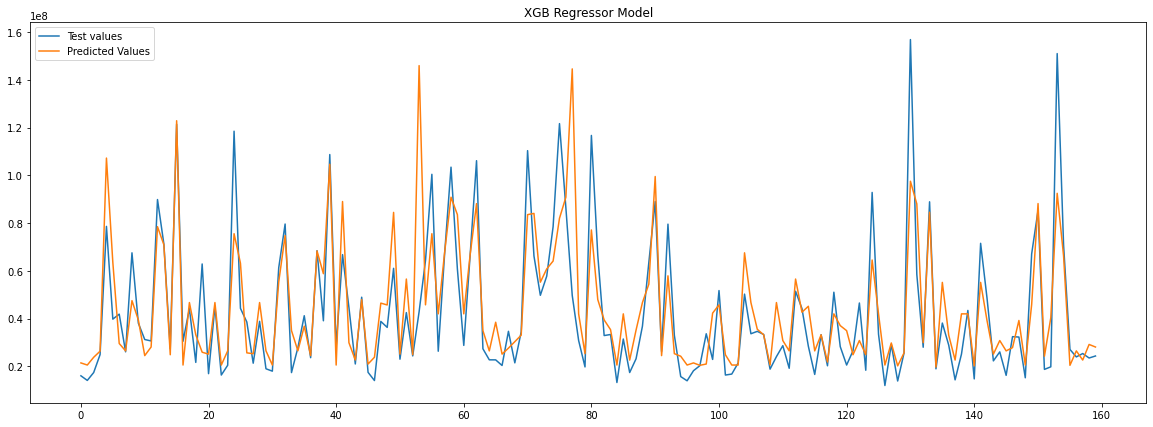

In [1110]:
plt.figure(figsize=(20,7))
plt.title('XGB Regressor Model')
plt.plot(y_test.values)
plt.plot(y_pred)
plt.legend(['Test values','Predicted Values'])

In [1112]:
dict_scores['XGB Regressor']=XGB_score

## SVR Model

In [1115]:
# Constructing the model

In [1116]:
SVR=SVR()

In [1117]:
# Train the model

In [1118]:
SVR.fit(X_train,y_train)

SVR()

In [1119]:
# Making Predictions

In [1120]:
y_pred=SVR.predict(X_test)

In [1121]:
# Scores

In [1122]:
SVR_score=r2_score(y_test,y_pred)*100

In [1123]:
SVR_score

-5.589299686200366

In [1124]:
SVR.score(X_train,y_train)

-0.14946379824800715

In [1125]:
SVR.score(X_test,y_test)

-0.05589299686200366

In [1126]:
# Visulaizing the results

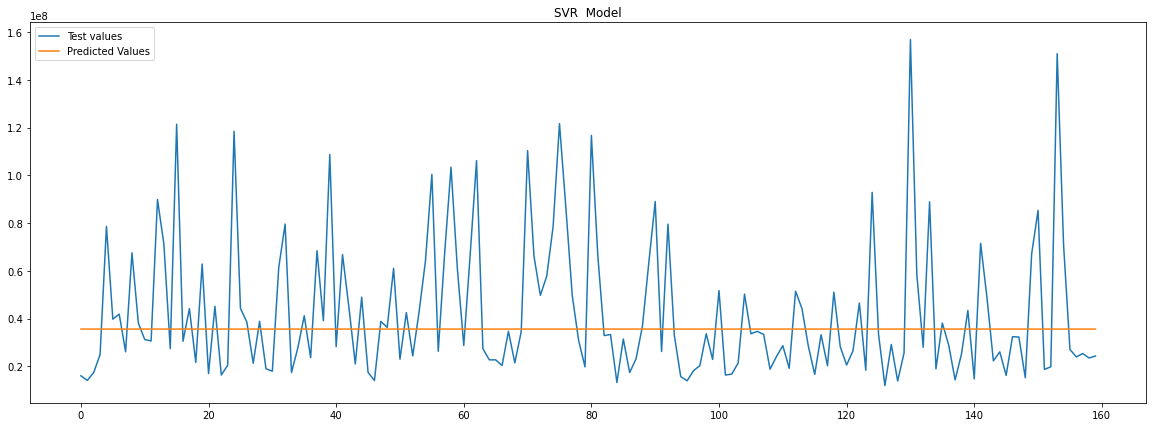

In [1127]:
plt.figure(figsize=(20,7))
plt.title('SVR  Model')
plt.plot(y_test.values)
plt.plot(y_pred)
plt.legend(['Test values','Predicted Values'])

In [1128]:
dict_scores['SVR']=SVR_score

# Ploting the overall result for all the alghoritms

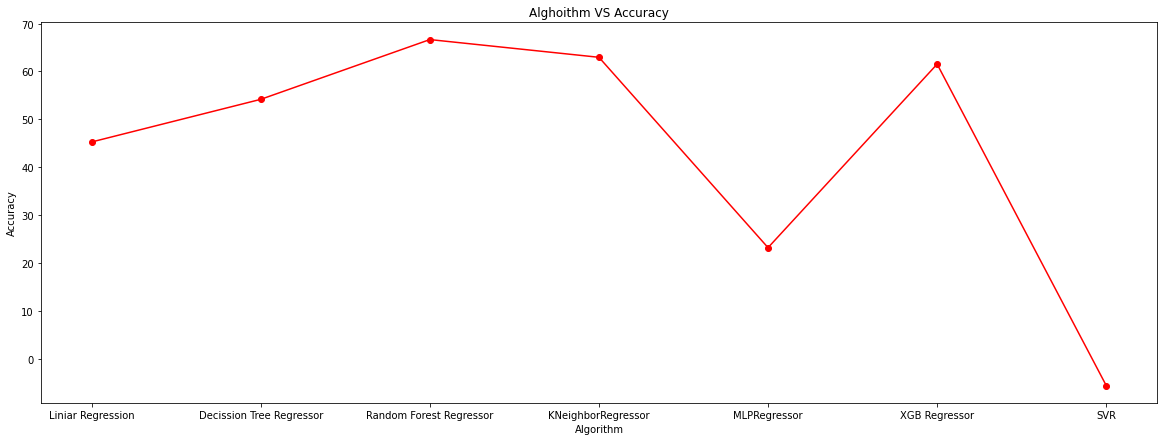

In [1130]:
plt.figure(figsize=(20,7))
plt.title('Alghoithm VS Accuracy')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.plot(dict_scores.keys(),dict_scores.values(),marker='o',color='red')